Epoch 1/5
125/125 [==============================] - 5s 31ms/step - loss: 0.8733 - accuracy: 0.6910 - val_loss: 0.6192 - val_accuracy: 0.7860
Epoch 2/5
125/125 [==============================] - 4s 30ms/step - loss: 0.5058 - accuracy: 0.8139 - val_loss: 0.4617 - val_accuracy: 0.8325
Epoch 3/5
125/125 [==============================] - 4s 29ms/step - loss: 0.4446 - accuracy: 0.8391 - val_loss: 0.4492 - val_accuracy: 0.8395
Epoch 4/5
125/125 [==============================] - 5s 38ms/step - loss: 0.3911 - accuracy: 0.8574 - val_loss: 0.4354 - val_accuracy: 0.8435
Epoch 5/5
63/63 [==============================] - 0s 5ms/step - loss: 0.3982 - accuracy: 0.8620
Test Accuracy: 0.8620


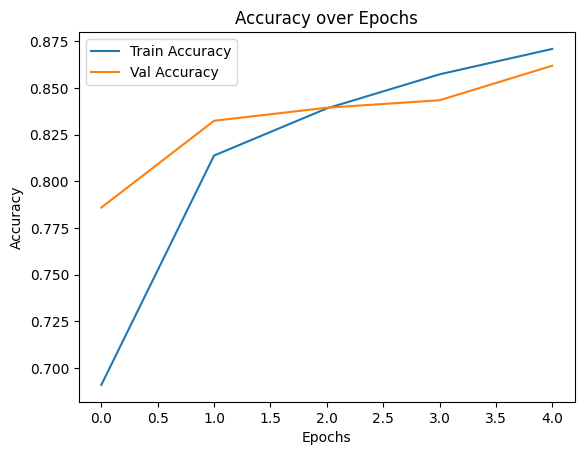

63/63 [==============================] - 0s 4ms/step


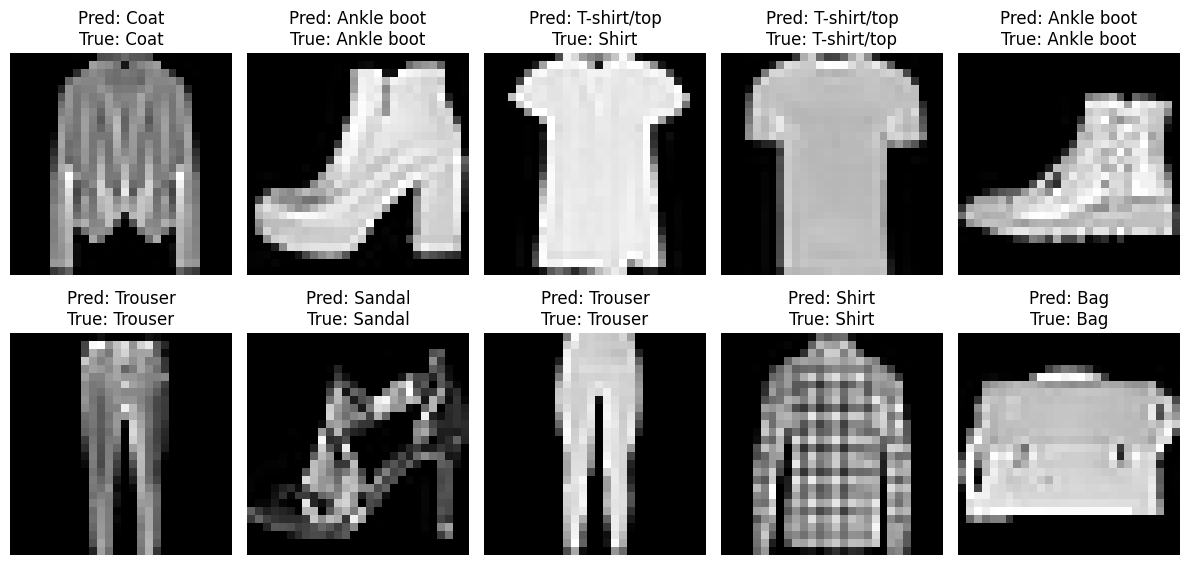

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# ✅ Load the CSV dataset
# Assuming the CSV file has columns like 'label', 'pixel1', 'pixel2', ..., 'pixel784' for each 28x28 image
# Replace 'your_dataset.csv' with the path to your CSV file
df = pd.read_csv("fashion-mnist_test.csv")

# Split data into features and labels
x = df.drop('label', axis=1).values  # All columns except 'label' are pixel values
y = df['label'].values  # 'label' column contains the class labels

# Reshape the data to 28x28x1 images (for grayscale images)
x = x.reshape(-1, 28, 28, 1)

# Normalize pixel values to the range [0, 1]
x = x / 255.0

# Convert labels to categorical format (one-hot encoding)
y = to_categorical(y, 10)

# ✅ Split the data into training and test sets
# Assuming 80% for training and 20% for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ✅ Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First Conv Layer
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling Layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Second Conv Layer
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling Layer
    Flatten(),  # Flatten the 2D outputs to 1D
    Dense(128, activation='relu'),  # Fully connected hidden layer
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# ✅ Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# ✅ Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# ✅ Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ✅ Class names for better readability
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# ✅ Predict classes for the test set
predictions = model.predict(x_test)

# ✅ Convert prediction probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# ✅ Visualize the first 10 predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[true_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
